# Data Wrangling Project for Twitter WeRateDogs

## Gather Data

In [1]:
import pandas as pd

### Doc 1: df_twitter - The WeRateDogs Twitter archive

In [2]:
df_twitter=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Doc 2: df_image - the tweet image predictions

In [4]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)   
# Import the tweet image predictions TSV file into a DataFrame
df_image=pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Doc 3: df_txt - query the Twitter API for each tweet's JSON data using Python's Tweepy library 

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "hidden"
consumer_secret = "hidden"
access_token = "hidden"
access_secret = "hidden"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [7]:
df_list=[]
with open('tweet_json.txt','r') as json_file:
    for line in json_file:
        data= json.loads(line)
    # Append to list of dictionaries
        df_list.append({'tweet_ID': data['id'],
                    'retweet_count': data['retweet_count'],
                    'favorite_count': data['favorite_count']})
df_txt= pd.DataFrame(df_list, columns = ['tweet_ID', 'retweet_count', 'favorite_count'])

In [8]:
df_txt.head()

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,7755,36452
1,892177421306343426,5744,31415
2,891815181378084864,3802,23661
3,891689557279858688,7915,39771
4,891327558926688256,8543,37978


## Access Data

### Quality issues:

for Doc 1

a1. Incorrect "None" name and lowercase names showing "a","an", "the","very"，etc.

a2. Clean timestamp and retweeted_status_timestamp with clear date format.

a3. Change data type: retweeted_status_id and retweeted_status_user_id data format is "+e8", need consistent with tweet_id's data type.

a4. Remove outliers for rating_numerator and rating_denominator.

a5. Source column: remove unnecessary html tags : <"a>"; <"/a>" and only present url info.

a6. We want to keep original ratings (no retweets) for images file, so need drop retweeted_status_id.

for Doc 2

a7. Change p1_conf, p2_conf, p2_conf percentage data format to Two-digit integer and rename the column names.

a8. p1, p2, p3 breed names all change to first upper and the other lower case.

### Tidiness issues:

for Doc 1

b1. doggo, floofer, pupper and puppo columns in doc1 table should be merged into one column named "stage"

Join all data table

b2. Merge df_twitter, df_image and df_txt files together by Twitter_id.

In [9]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Clean Data

In [11]:
# Take a copy of arc_df on which the cleaning tasks will be performed
df_twitter_clean = df_twitter.copy()

In [12]:
df_image_clean = df_image.copy()

### a1. Incorrect "None" name and lowercase names showing "a","an", "the","very"，etc.

In [13]:
#define
df_twitter_clean.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

In [14]:
#code
#Name showing "None"
df_twitter_clean.name[df_twitter_clean.name=="None"].value_counts()

None    745
Name: name, dtype: int64

In [15]:
#Name showing lowercase: "a","an", "the","very"，etc
x=df_twitter_clean[df_twitter_clean.name.str.match('[a-z]+')==True]
x_list=x.name
x_list

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

In [16]:
#Replace these lowercase name to "None"
for x in x_list:
    df_twitter_clean.name.replace(x,"None",inplace=True)
df_twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
#test
df_twitter_clean.name[df_twitter_clean.name=="None"].value_counts()

None    854
Name: name, dtype: int64

In [18]:
df_twitter_clean.name.value_counts().sort_index(ascending=False)

Zuzu            1
Zooey           1
Zoey            3
Zoe             1
Ziva            1
Zeus            1
Zeke            3
Zeek            1
Zara            1
Yukon           1
Yogi            2
Yoda            1
Wyatt           3
Wishes          1
Winston         9
Winnie          4
Winifred        1
Wilson          3
Willy           1
Willow          1
Willie          1
William         1
Willem          1
Wiggles         1
Wesley          1
Watson          2
Walter          4
Wally           2
Wallace         3
Walker          1
               ..
Apollo          1
Antony          1
Anthony         1
Anna            1
Angel           1
Andy            1
Andru           1
Anakin          2
Amélie          1
Amy             1
Ambrose         1
Amber           1
Alice           2
Alfy            1
Alfie           5
Alf             1
Alexanderson    1
Alexander       1
Alejandro       1
Aldrick         1
Albus           2
Albert          2
Al              1
Akumi           1
Aja       

### a2. Clean timestamp and retweeted_status_timestamp with clear date format.

In [19]:
#define
df_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
#code
df_twitter_clean.timestamp= pd.to_datetime(df_twitter_clean.timestamp)
df_twitter_clean.retweeted_status_timestamp= pd.to_datetime(df_twitter_clean.retweeted_status_timestamp)

In [21]:
#test
df_twitter_clean.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
40,884562892145688576,NaN,NaN,2017-07-11 00:00:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. He's just so happy. 13/10 what ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/884562892...,13,10,Kevin,None,None,None,None
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,None,None,None,None
1092,737322739594330112,NaN,NaN,2016-05-30 16:40:14,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's not injured or anythi...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/737322739...,9,10,Lily,None,None,None,None
2010,672248013293752320,NaN,NaN,2015-12-03 02:56:30,"<a href=""http://twitter.com/download/iphone"" r...",10/10 for dog. 7/10 for cat. 12/10 for human. ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672248013...,10,10,None,None,None,None,None
1075,739623569819336705,NaN,NaN,2016-06-06 01:02:55,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo that don't need no human. 12/10...,NaN,NaN,NaT,https://vine.co/v/iY9Fr1I31U6,12,10,None,doggo,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/746872823...,11,10,None,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,None,None,None,None
1132,728760639972315136,NaN,NaN,2016-05-07 01:37:30,"<a href=""http://twitter.com/download/iphone"" r...","When you're way too slow for the ""down low"" po...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/728760639...,13,10,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,None,None,None,None


### a3. Change data type: retweeted_status_id and retweeted_status_user_id data format is "+e8", need consistent with tweet_id's data type.

In [22]:
#define
df_twitter_clean[df_twitter_clean["retweeted_status_id"].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [23]:
#code
import numpy as np
df_twitter_clean.retweeted_status_id=df_twitter_clean.retweeted_status_id.fillna(0)
df_twitter_clean.retweeted_status_id=df_twitter_clean.retweeted_status_id.astype(np.int64)

df_twitter_clean.retweeted_status_user_id=df_twitter_clean.retweeted_status_user_id.fillna(0)
df_twitter_clean.retweeted_status_user_id=df_twitter_clean.retweeted_status_user_id.astype(np.int64)

In [24]:
#test
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

### a4. Remove outliers for rating_numerator and rating_denominator.

In [25]:
#define
df_twitter_clean.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [26]:
df_twitter_clean.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [27]:
#code
#these max numbers doesn't make sense, I will remove the rating_numerator > 15; rating_denominator >15
high_rating_numerator=df_twitter_clean.query('rating_numerator>15') 
high_rating_numerator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,0,0,NaT,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,0,0,NaT,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,0,0,NaT,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,0,0,NaT,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,0,0,NaT,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",786709082849828864,4196983835,2016-10-13 23:23:56,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,0,0,NaT,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,0,0,NaT,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",0,0,NaT,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,0,0,NaT,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [28]:
df_twitter_clean.drop(high_rating_numerator.index,inplace=True)

In [29]:
high_rating_denominator=df_twitter_clean.query('rating_denominator>15')
high_rating_denominator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,0,0,NaT,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,0,0,NaT,NaN,4,20,None,None,None,None,None


In [30]:
df_twitter_clean.drop(high_rating_denominator.index,inplace=True)

In [31]:
#test
df_twitter_clean.rating_numerator.describe()

count    2328.000000
mean       10.697165
std         2.185185
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: rating_numerator, dtype: float64

In [32]:
df_twitter_clean.rating_denominator.describe()

count    2328.000000
mean       10.000000
std         0.198836
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        15.000000
Name: rating_denominator, dtype: float64

### a5. Source column: remove unnecessary html tags : <"a>"; <"/a>" and only present url info.

In [33]:
#define
df_twitter_clean.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [34]:
#code
df_twitter_clean.source=df_twitter_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [35]:
#test
df_twitter_clean.source.value_counts()

Twitter for iPhone     2194
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

### a6. We want to keep original ratings (no retweets) for images file, so need drop retweeted_status_id.

In [36]:
df_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,0,0,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,0,0,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,0,0,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,0,0,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,0,0,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [37]:
#define
df_twitter_clean[df_twitter.retweeted_status_id.isnull() == False].count()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


tweet_id                      180
in_reply_to_status_id           0
in_reply_to_user_id             0
timestamp                     180
source                        180
text                          180
retweeted_status_id           180
retweeted_status_user_id      180
retweeted_status_timestamp    180
expanded_urls                 179
rating_numerator              180
rating_denominator            180
name                          180
doggo                         180
floofer                       180
pupper                        180
puppo                         180
dtype: int64

In [38]:
#code
df_twitter_clean.retweeted_status_id=df_twitter_clean[df_twitter_clean.retweeted_status_id.isnull()]

In [39]:
#test
df_twitter_clean[df_twitter_clean.retweeted_status_id.isnull() == False].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

### a7. Change p1_conf, p2_conf, p2_conf percentage data format to Two-digit integer.

In [41]:
#define
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1793,831262627380748289,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,1,cocker_spaniel,0.263323,True,Brittany_spaniel,0.200550,True,doormat,0.193414,False
2036,884441805382717440,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True
1585,797545162159308800,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.954089,True,Cardigan,0.033644,True,papillon,0.009736,True
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True
793,690735892932222976,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,golden_retriever,0.883229,True,Labrador_retriever,0.109635,True,kuvasz,0.002795,True


In [42]:
#code
df_image_clean.p1_conf=df_image_clean.p1_conf*100
df_image_clean.p1_conf=df_image_clean.p1_conf.astype(str).str[:-2]
df_image_clean.rename(columns={'p1_conf': 'p1_%'}, inplace=True)

In [43]:
df_image_clean.p2_conf=df_image_clean.p2_conf*100
df_image_clean.p2_conf=df_image_clean.p2_conf.astype(str).str[:-2]
df_image_clean.rename(columns={'p2_conf': 'p2_%'}, inplace=True)

In [44]:
df_image_clean.p3_conf=df_image_clean.p3_conf*100
df_image_clean.p3_conf=df_image_clean.p3_conf.astype(str).str[:-2]
df_image_clean.rename(columns={'p3_conf': 'p2_%'}, inplace=True)

In [45]:
#test
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_%,p1_dog,p2,p2_%,p2_dog,p3,p2_%,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.50,True,collie,15.66,True,Shetland_sheepdog,6.142,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.68,True,miniature_pinscher,7.419,True,Rhodesian_ridgeback,7.2,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.64,True,malinois,13.85,True,bloodhound,11.61,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.81,True,redbone,36.06,True,miniature_pinscher,22.27,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.03,True,Rottweiler,24.36,True,Doberman,15.46,True


### a8. p1, p2, p3 breed names all change to first upper and the other lower case.

In [46]:
#define
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
175,669037058363662336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,Chihuahua,0.803528,True,Pomeranian,0.053871,True,chow,0.032257,True
864,697270446429966336,https://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg,1,toy_poodle,0.880014,True,miniature_poodle,0.100136,True,Norfolk_terrier,0.007027,True
771,689517482558820352,https://pbs.twimg.com/media/CZGofjJW0AINjN9.jpg,1,Pembroke,0.799319,True,Cardigan,0.189537,True,papillon,0.003386,True
778,689877686181715968,https://pbs.twimg.com/media/CZLwGAIWQAIYsTx.jpg,1,Old_English_sheepdog,0.269155,True,Tibetan_terrier,0.111496,True,Lakeland_terrier,0.104939,True


In [47]:
#code
df_image_clean.p1=df_image_clean.p1.str.capitalize()
df_image_clean.p2=df_image_clean.p1.str.capitalize()
df_image_clean.p3=df_image_clean.p1.str.capitalize()

In [48]:
#test
df_image_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_%,p1_dog,p2,p2_%,p2_dog,p3,p2_%,p3_dog
1192,739979191639244800,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,1,Irish_water_spaniel,28.,True,Irish_water_spaniel,24.06,False,Irish_water_spaniel,7.491,True
356,672604026190569472,https://pbs.twimg.com/media/CVWRyylWIAAMltv.jpg,1,Toy_poodle,82.01,True,Toy_poodle,17.84,True,Toy_poodle,0.02911,False
1847,839290600511926273,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg,1,Web_site,67.08,False,Web_site,10.15,False,Web_site,7.530,False
1656,810657578271330305,https://pbs.twimg.com/media/C0AIwgVXAAAc1Ig.jpg,1,Malamute,75.35,True,Malamute,16.61,True,Malamute,6.981,True
513,676219687039057920,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,Bubble,99.75,False,Bubble,0.01589,False,Bubble,0.01324,True


### b1. doggo, floofer, pupper and puppo columns in df_twitter table should be merged into one column named "stage"

In [49]:
#define
df_twitter_clean.doggo.value_counts()

None     2231
doggo      97
Name: doggo, dtype: int64

In [50]:
df_twitter_clean.floofer.value_counts()

None       2318
floofer      10
Name: floofer, dtype: int64

In [51]:
df_twitter_clean.pupper.value_counts()

None      2072
pupper     256
Name: pupper, dtype: int64

In [52]:
df_twitter_clean.puppo.value_counts()

None     2298
puppo      30
Name: puppo, dtype: int64

In [53]:
#code
df_twitter_clean['doggo'].replace('None','',inplace=True)
df_twitter_clean['floofer'].replace('None','',inplace=True)
df_twitter_clean['pupper'].replace('None','',inplace=True)
df_twitter_clean['puppo'].replace('None','',inplace=True)

In [54]:
df_twitter_clean['stage']=df_twitter_clean['doggo']+df_twitter_clean['floofer']+df_twitter_clean['pupper']+df_twitter_clean['puppo']

In [55]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_twitter_clean = df_twitter_clean.drop(columns, axis=1)

In [56]:
#test
df_twitter_clean.stage.value_counts()

                1949
pupper           244
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

### b2. Merge df_twitter, df_image and df_txt files together by Twitter_id.

In [57]:
#code
df_all_clean = pd.merge(left=df_twitter_clean, right=df_txt, left_on='tweet_id', right_on='tweet_ID', how='inner')

In [58]:
df_all_clean = df_all_clean.merge(df_image_clean, on='tweet_id', how='inner')

In [59]:
df_all_clean = df_all_clean.drop('tweet_ID', axis=1)

In [60]:
#test
df_all_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_%,p1_dog,p2,p2_%,p2_dog,p3,p2_%,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,0,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,Orange,9.704,False,Orange,8.585,False,Orange,7.6,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,0,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,32.35,True,Chihuahua,9.064,True,Chihuahua,6.895,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,0,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,71.60,True,Chihuahua,7.82,True,Chihuahua,3.137,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,0,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,Paper_towel,17.02,False,Paper_towel,16.80,True,Paper_towel,4.083,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,0,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,Basset,55.57,True,Basset,22.5,True,Basset,17.52,True


## Store Data

In [61]:
df_all_clean.to_csv('twitter_archive_master.csv', index=False)

In [62]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2038
Data columns (total 27 columns):
tweet_id                      2039 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2039 non-null datetime64[ns]
source                        2039 non-null object
text                          2039 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      2039 non-null int64
retweeted_status_timestamp    72 non-null datetime64[ns]
expanded_urls                 2039 non-null object
rating_numerator              2039 non-null int64
rating_denominator            2039 non-null int64
name                          2039 non-null object
stage                         2039 non-null object
retweet_count                 2039 non-null int64
favorite_count                2039 non-null int64
jpg_url                       2039 non-null object
img_num                

# Analyze Data

In [63]:
import pandas as pd
df=pd.read_csv('twitter_archive_master.csv')

In [64]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_%,p1_dog,p2,p2_%,p2_dog,p3,p2_%.1,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,0,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,Orange,9.704,False,Orange,8.585,False,Orange,7.6,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,0,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,32.350,True,Chihuahua,9.064,True,Chihuahua,6.895,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,0,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,71.600,True,Chihuahua,7.82,True,Chihuahua,3.137,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,0,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,Paper_towel,17.020,False,Paper_towel,16.80,True,Paper_towel,4.083,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,0,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,Basset,55.570,True,Basset,22.5,True,Basset,17.52,True


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

### Insight 1 Twitter source histogram

Text(0,0.5,'Number of Twitter ID')

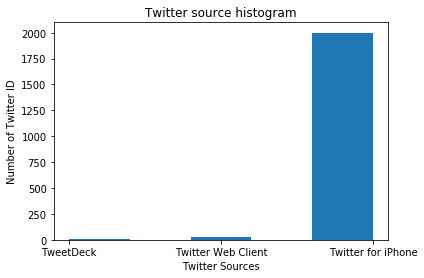

In [66]:
c1=plt.hist(df['source'],bins=5)
plt.title('Twitter source histogram')
plt.xlabel('Twitter Sources')
plt.ylabel('Number of Twitter ID')

### Insight 2 Dog Rating bar chart

In [67]:
df['rating']=df['text'].str.extract(r'([0-9]+[0-9.]*/[0-9]+[0-9]*)',expand=False)

Text(0,0.5,'Number of Dogs')

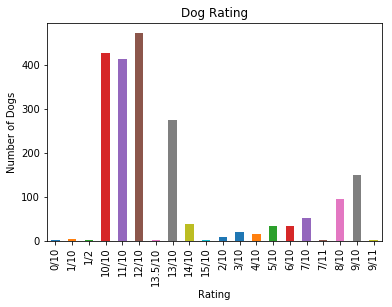

In [68]:
c2 = df.rating.value_counts().sort_index().plot('bar', title = 'Dog Rating')
c2.set_xlabel("Rating")
c2.set_ylabel("Number of Dogs")

### Insight 3 Dog stage pie chart

Text(0.5,1,'Dog stage')

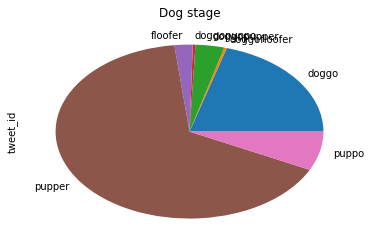

In [69]:
c3=df.groupby('stage')['tweet_id'].count().plot(kind = 'pie')
plt.title('Dog stage')

### Insight 4 - Retweets and favorites over time

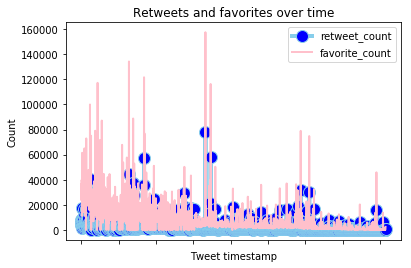

In [70]:
df.set_index('timestamp', inplace=True)
df['retweet_count'].plot(marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
df['favorite_count'].plot(marker='', color='pink', linewidth=2)
plt.legend()
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.show()